<a href="https://colab.research.google.com/github/runnily/making-a-neural-network-layer-by-layer/blob/main/forward_thinking_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward thinking

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
!ls

data  FTNN.py  LICENSE	MNIST  README.md  sample_data  utils


# Analysing the CIFAR-10 dataset using a basic net we have built.

This section is comparing the performance using different approachs: Forward thinking and backpropgation. 

The forward thinking algorthium was trained on 2 epochs for every layer

The backpropgation was trained for 40 epochs

In [8]:
ft_cifar_10 = pd.read_csv("utils/recorded-accuracy/ft-cifar-10.csv")
ft_cifar_10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,5.558790,1.505812,0.479536,0.5497
1,1,11.197962,1.195938,0.587932,0.5782
2,2,16.879389,1.065542,0.636749,0.5849
3,3,22.796011,0.973027,0.668115,0.5892
4,4,28.469296,0.907742,0.692703,0.6029


In [34]:
bp_cifar_10 = pd.read_csv("utils/recorded-accuracy/bp-cifar-10.csv")
bp_cifar_10_ = bp_cifar_10[bp_cifar_10['time_elapsed'] < 850]
bp_cifar_10_.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,67.884914,2.007153,0.275116,0.4094
1,1,135.665133,1.495680,0.467783,0.5202
2,2,203.467641,1.244175,0.562676,0.5982
3,3,271.167102,1.049335,0.635522,0.6565
4,4,338.943836,0.896587,0.692004,0.6798


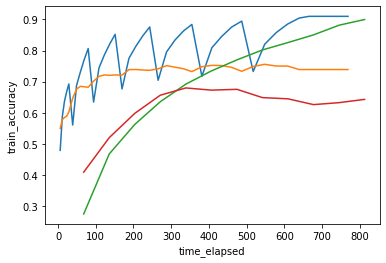

In [36]:
fig, ax = plt.subplots()
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_cifar_10, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_cifar_10, ax=ax)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_cifar_10_, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_cifar_10_, ax=ax)

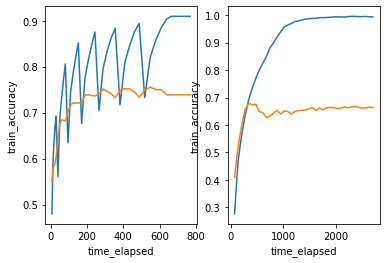

In [38]:
fig, axs = plt.subplots(ncols=2)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_cifar_10, ax=axs[0])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_cifar_10, ax=axs[0])
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_cifar_10, ax=axs[1])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_cifar_10, ax=axs[1])

# Analysing the SVHN dataset using a basic net we have built.

The SVHN was training using forward network with 2 epochs for each new layer added

In [40]:
ft_svhn = pd.read_csv("utils/recorded-accuracy/ft-svhn.csv")
ft_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,8.946414,1.180336,0.649162,0.747580
1,1,17.907557,0.707308,0.795256,0.758528
2,0,33.813366,0.750680,0.784240,0.813537
3,1,49.520891,0.537215,0.852971,0.828634
4,0,70.604311,0.656331,0.814808,0.833474


In [49]:
bp_svhn = pd.read_csv("utils/recorded-accuracy/bp-svhn.csv")
bp_svhn_ = bp_svhn[bp_svhn['time_elapsed'] < 450]
bp_svhn_.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,70.325680,1.955420,0.318493,0.670406
1,1,140.589875,0.757669,0.775936,0.816572
2,2,210.835141,0.483659,0.864074,0.855025
3,3,281.107383,0.397483,0.888439,0.881185
4,4,351.312008,0.341112,0.905497,0.892824


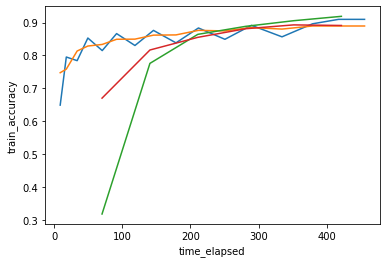

In [50]:
fig, ax = plt.subplots()
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_svhn, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_svhn, ax=ax)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_svhn_, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_svhn_, ax=ax)

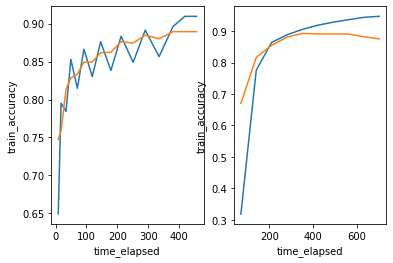

In [51]:
fig, axs = plt.subplots(ncols=2)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_svhn, ax=axs[0])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_svhn, ax=axs[0])
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_svhn, ax=axs[1])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_svhn, ax=axs[1])